In [17]:
#Library includes
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow, figure
import numpy as np # Needed for remove_blur
import scipy.ndimage
from scipy import ndimage, misc
from scipy.ndimage.filters import gaussian_filter   # Needed for xdog, dog and hatch
import cv2 # Needed for xdog, dog, hatch and remove_blur
import pytest # Needed for the PyTest testing framework
import requests                                     # Needed for get_links_in_a_url
import re                                           # Needed for get_links_in_a_url
import vlc # Needed by media_player_vlc
import time # Needed by media_player_vlc
from utils import alpha_blending, showimage, reading_in_an_image, xdog, dog, hatch, threshold, sobel, laplace, gaussian_blur, erode, edge_canny, grayscale, save_to_file, dilate
import math # Needed for find_string_in_index
import os # Needed for find_string_in_index
import glob # Needed for reading_in_an_image
import sys

In [18]:
# Load two images
img1 = cv2.imread('data/utm_00000.mask.png')
img2 = cv2.imread('data/utm_00002.mask.png')
img3 = cv2.imread('data/00002.seg.png')

In [19]:
def outline(image, thickness=1, colour="#FFFFFF"):
    """filter: outline - it will get a mask image and a keyword argument (outline thickness) and a color argument.
    It will dilate the source mask image by the thickness (e.g. thickness = 2) and it will XOR or DIFF the dilated
    image and the original image, leaving only a thin outline around the original mask. The oputline is then drawn
    by the specific color."""
    dilated_image = dilate(image, kernel_size=(thickness, thickness))
    outline_image = binary_xor(dilated_image, image) # dilated_image and original image
    # coloured_image = colour_the_image() # Will be implemented later and return the coloured image
    return outline_image

In [20]:
def binary_xor(img2, img1):
    # Take only region of logo from logo image.
    dst2 = img2.astype(np.uint8)
    dst1 = img1.astype(np.uint8)
    dst2_fg = cv2.bitwise_xor(dst2, dst1)
    return dst2_fg

In [21]:
def binary_and(img2, img1):
    # Take only region of logo from logo image.
    dst2 = img2.astype(np.uint8)
    dst1 = img1.astype(np.uint8)
    dst2_fg = cv2.bitwise_and(dst2, dst1)
    return dst2_fg

In [22]:
def binary_inversion(img):
    # Take only region of logo from logo image.
    dst1 = img.astype(np.uint8)
    dst1_fg = cv2.bitwise_not(dst1)
    return dst1_fg

In [23]:
def binary_difference(img2, img1):
    dst2 = binary_inversion(img2)
    dst1 = binary_xor(img1, dst2)
    return dst1

In [24]:
def colorize_mask(image, color=[255, 0, 0]): # [255, 0, 0] = red in RGB format
    # loop through all pixels, and replace those that are not strict white or black with white
    # width, height, channels = img.shape
    for x in range(image.shape[0]): # Width
        for y in range(image.shape[1]): # Height
            if (image[x,y]!=0).all() and (image[x,y]!=1).all(): # image[x,y] is the pixel color at width, height
                image[x,y] = color
    return image

In [25]:
def colorize_mask(image, color=[255, 0, 0], color_to_be_replaced=[255, 255, 255]):  # [255, 0, 0] = red in RGB format
    img1 = image.copy()
    white_pixels = np.where(img1 == color_to_be_replaced)
    img1[white_pixels[0], white_pixels[1], :] = color
    return img1

In [26]:
def convert_hash_to_rgb_color(string="#000000"):
    rgb_channel_red = "0x" + string[1:3]
    rgb_channel_blue = "0x" + string[3:5]
    rgb_channel_green = "0x" + string[5:7]
    
    return [int(rgb_channel_red, base=16), int(rgb_channel_blue, base=16), int(rgb_channel_green, base=16)]

In [27]:
def color_to_mask(image, color=[0, 255, 0], new_color=[0, 0, 0]):  # [255, 0, 0] = red in RGB format
    # Replaces all colors except the designated one
    # Replace all non needed colors in color_to_be_replaced by color
    img1 = image.copy()
    other_pixels = np.where(img1 != color)
    elected_pixels = np.where(img1 == color)
    img1[elected_pixels[0], elected_pixels[1], :] = [255, 255, 255]
    img1[other_pixels[0], other_pixels[1], :] = new_color
    return img1

In [28]:
def alpha_blending(foreground, background, alpha=0.5):
    dst = foreground * alpha + background * (1 - alpha)
    dst = dst.astype(np.uint8)
    return dst

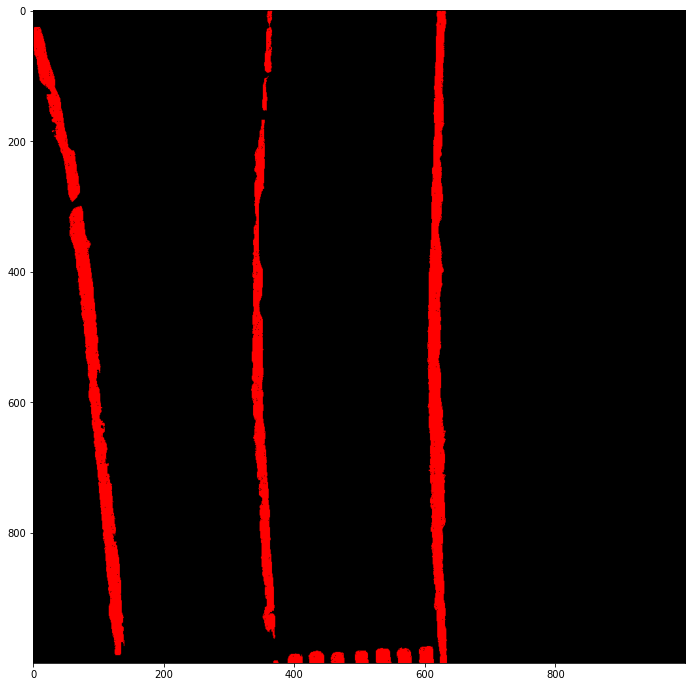

In [29]:
colorized_image = colorize_mask(img1)
showimage(colorized_image)

In [30]:
convert_hash_to_rgb_color(string="#010203")

[1, 2, 3]

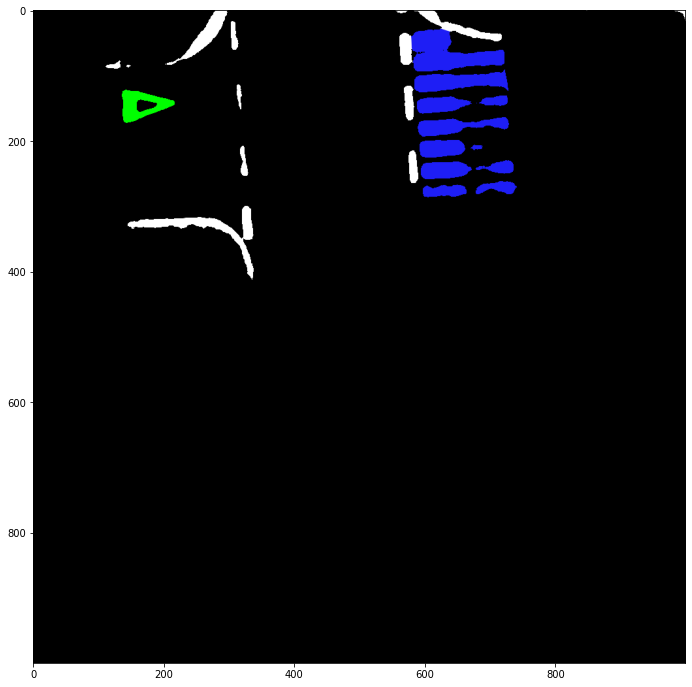

In [31]:
showimage(img3)

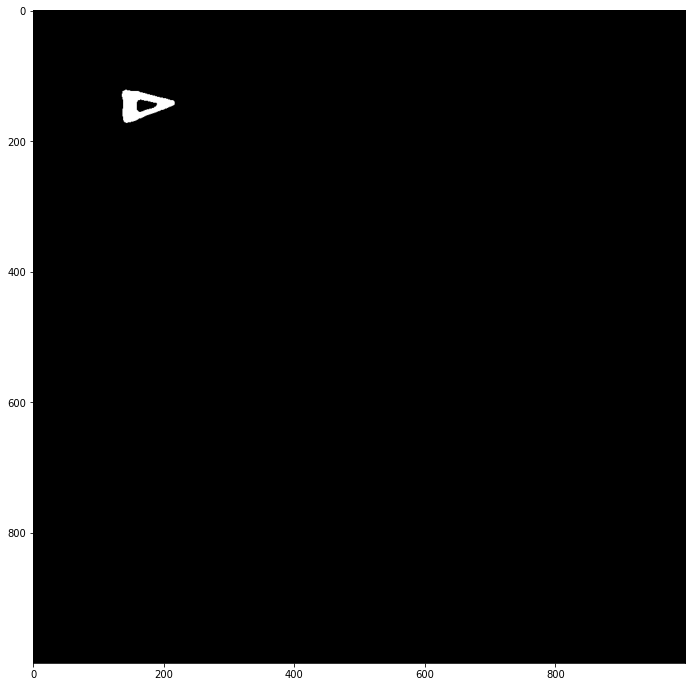

In [32]:
only_mask_image = color_to_mask(img3)
showimage(only_mask_image)